In [1]:
import re

import gensim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
def load_word2vec_model(model_path):
    """
    Carga un modelo Word2Vec entrenado desde un archivo.
    
    Args:
    model_path (str): Ruta al archivo del modelo entrenado.
    
    Returns:
    gensim.models.Word2Vec: El modelo Word2Vec cargado.
    """
    model = gensim.models.Word2Vec.load(model_path)
    return model

def reduce_dimensions(word_vectors, method='pca', n_components=2):
    """
    Reduce la dimensionalidad de los vectores de palabras a 2D para visualización.
    
    Args:
    word_vectors (numpy.ndarray): Vectores de palabras extraídos del modelo Word2Vec.
    method (str): Método de reducción de dimensionalidad ('pca' o 'tsne').
    n_components (int): Número de dimensiones deseadas (2 para visualización en 2D).
    
    Returns:
    numpy.ndarray: Vectores de palabras reducidos a 2D.
    """
    if method == 'pca':
        pca = PCA(n_components=n_components)
        reduced_vectors = pca.fit_transform(word_vectors)
    elif method == 'tsne':
        tsne = TSNE(n_components=n_components, random_state=42)
        reduced_vectors = tsne.fit_transform(word_vectors)
    else:
        raise ValueError("Método no soportado. Usa 'pca' o 'tsne'.")
    
    return reduced_vectors

def plot_embeddings(reduced_vectors, words, title='Visualización de Embeddings'):
    """
    Crea un gráfico 2D de los vectores de palabras reducidos.
    
    Args:
    reduced_vectors (numpy.ndarray): Vectores de palabras reducidos a 2D.
    words (list of str): Lista de palabras correspondientes a los vectores.
    title (str): Título del gráfico.
    """
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
    
    # Añadir las etiquetas (palabras) al gráfico
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))
    
    plt.title(title)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)
    plt.show()

Visualizando embeddings para Sense and Sensibility de Jane Austen...


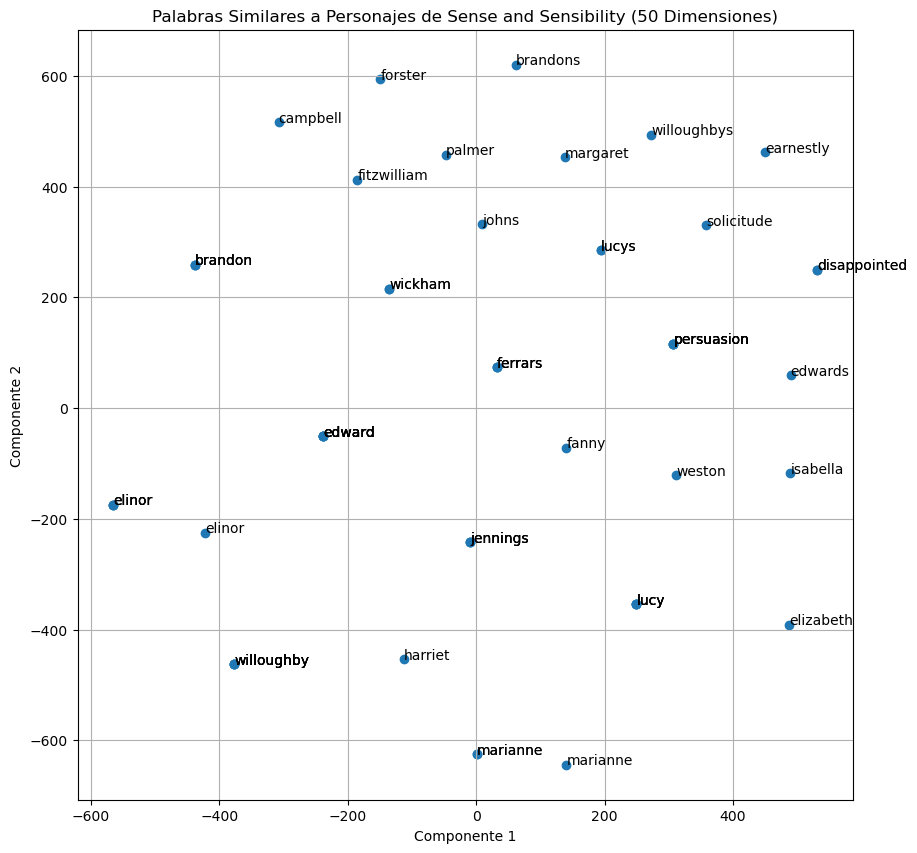

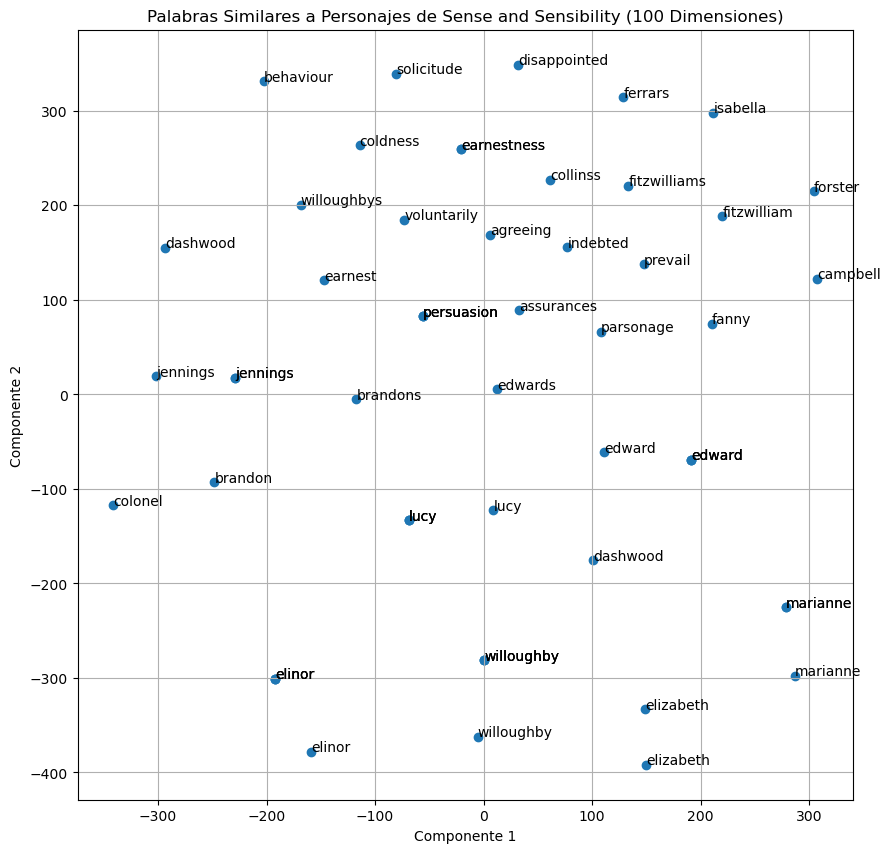

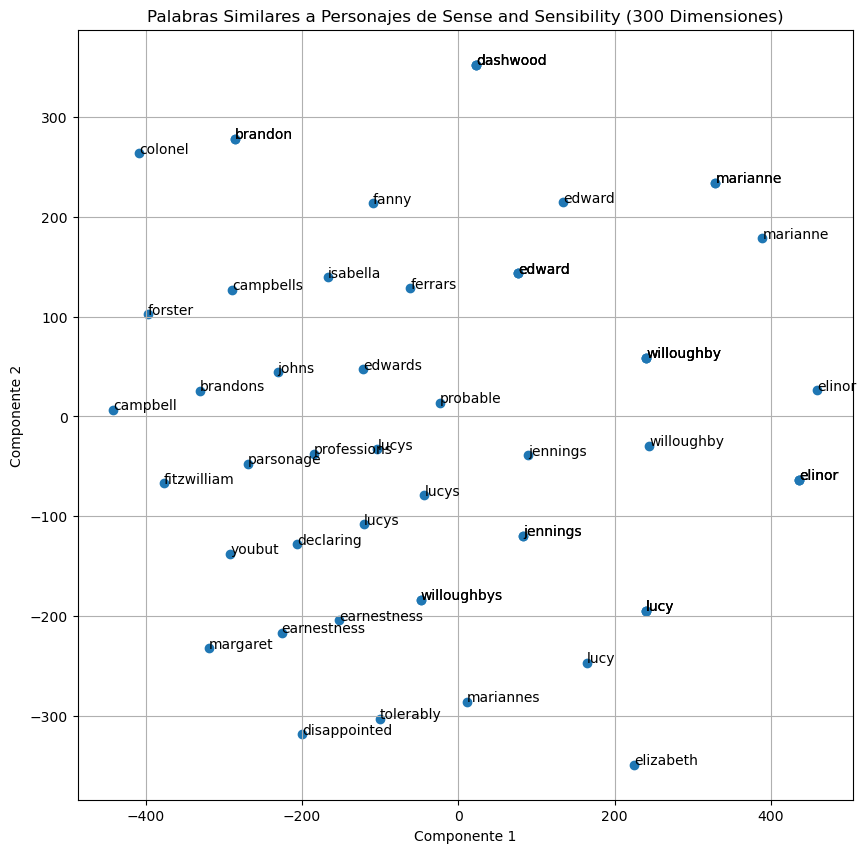

Visualizando embeddings para Pride and Prejudice de Jane Austen...


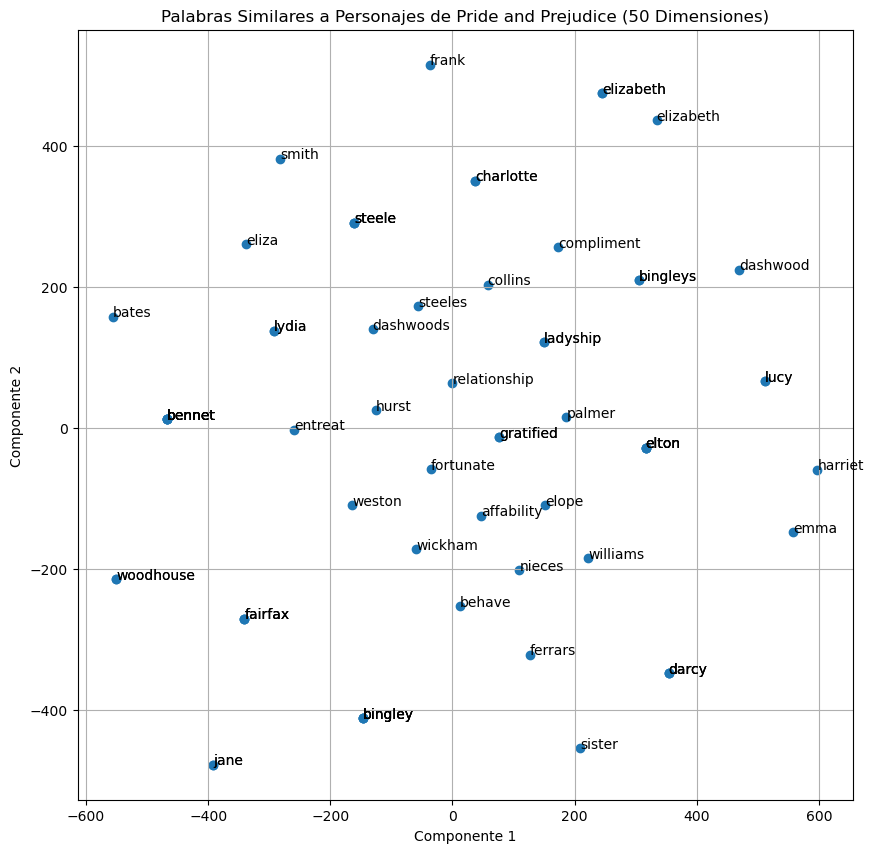

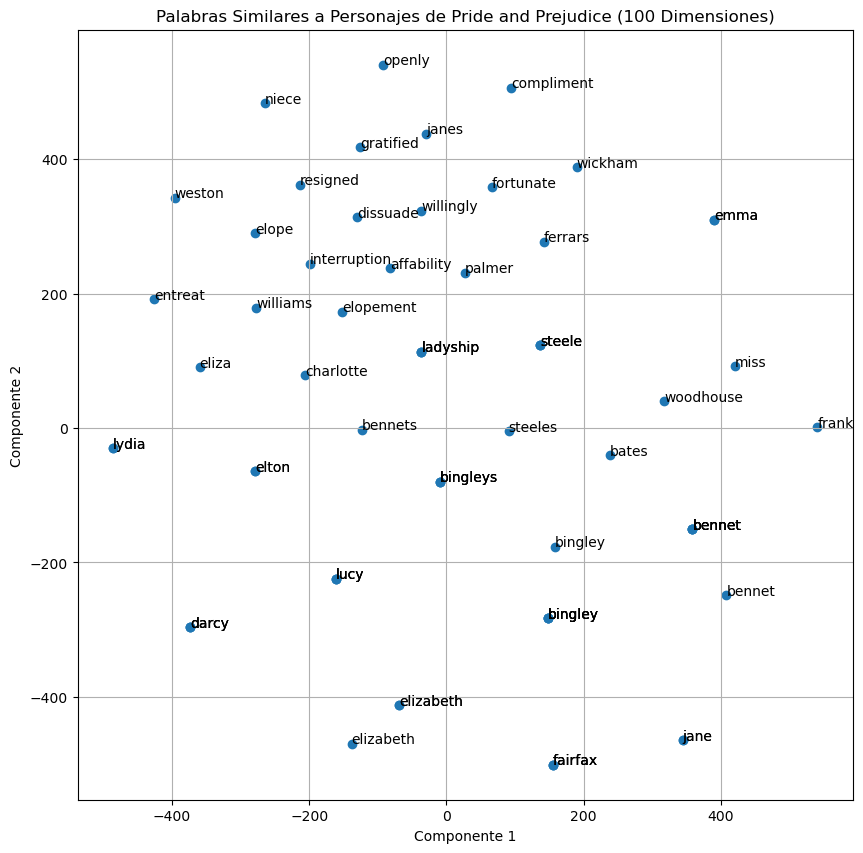

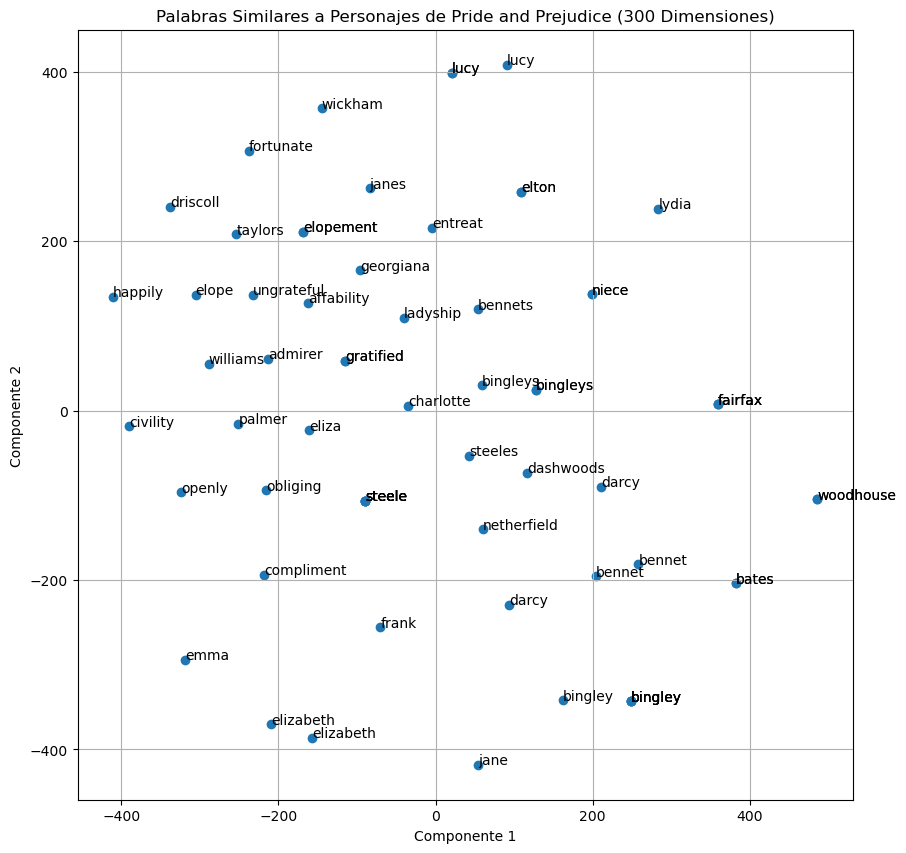

Visualizando embeddings para Emma de Jane Austen...


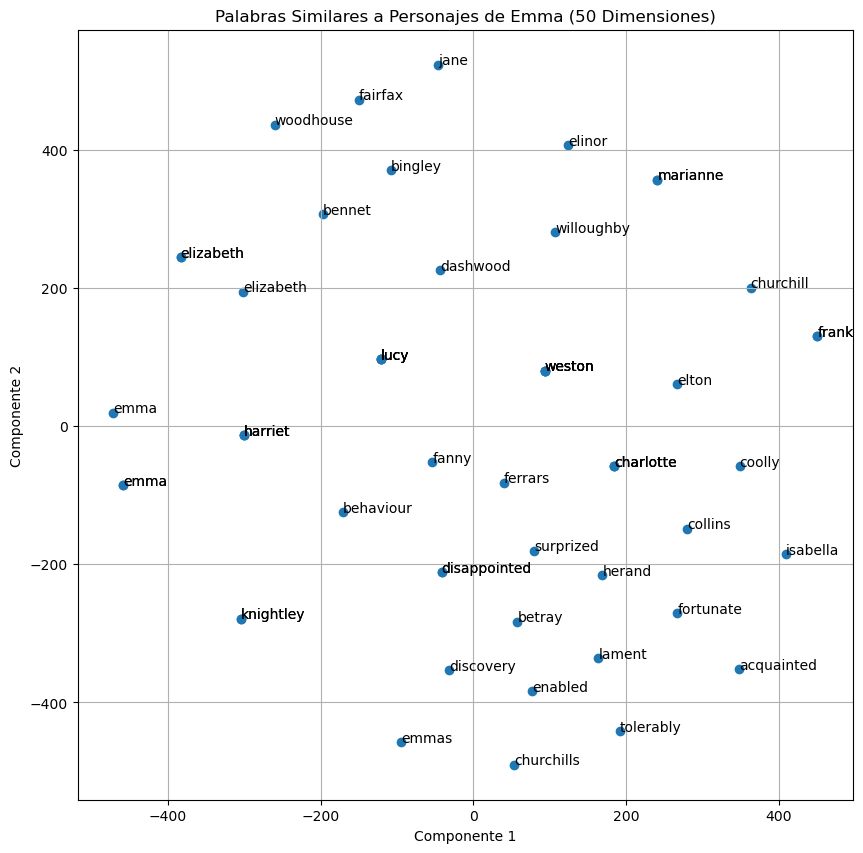

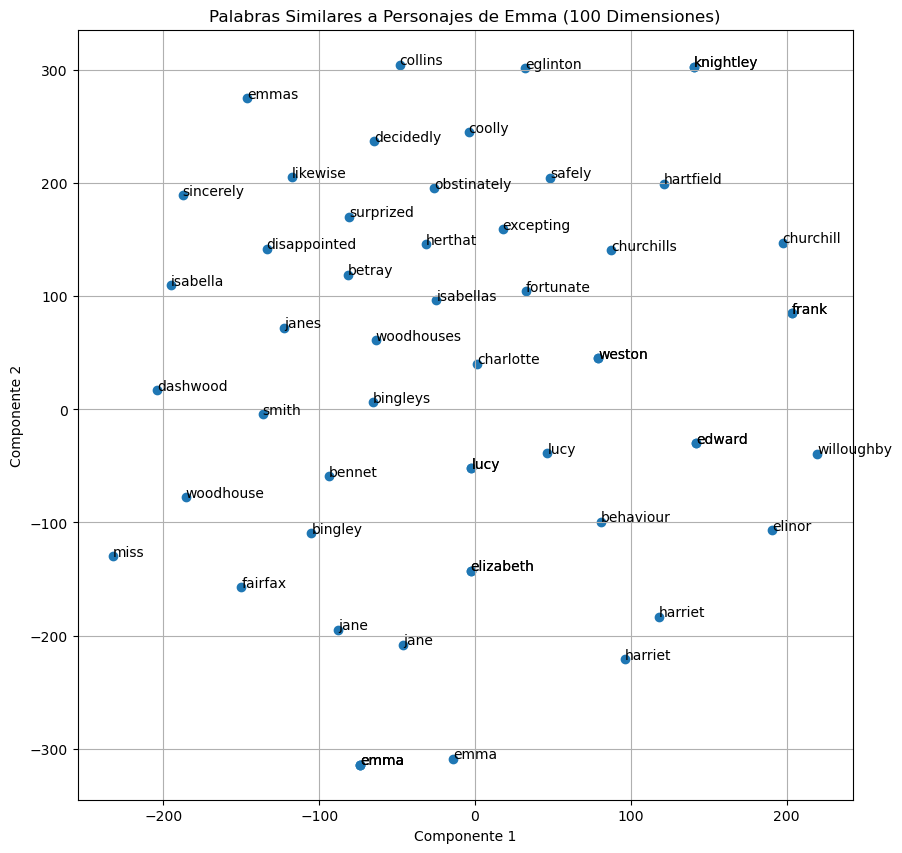

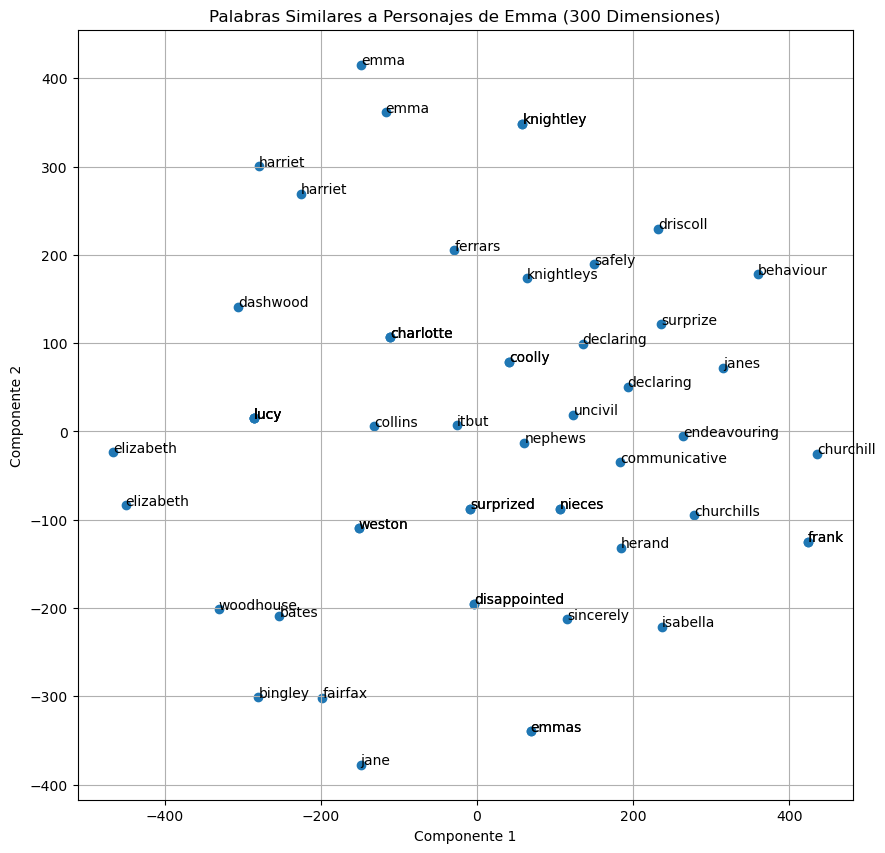

Visualizando embeddings para Youth de Leo Tolstoy...


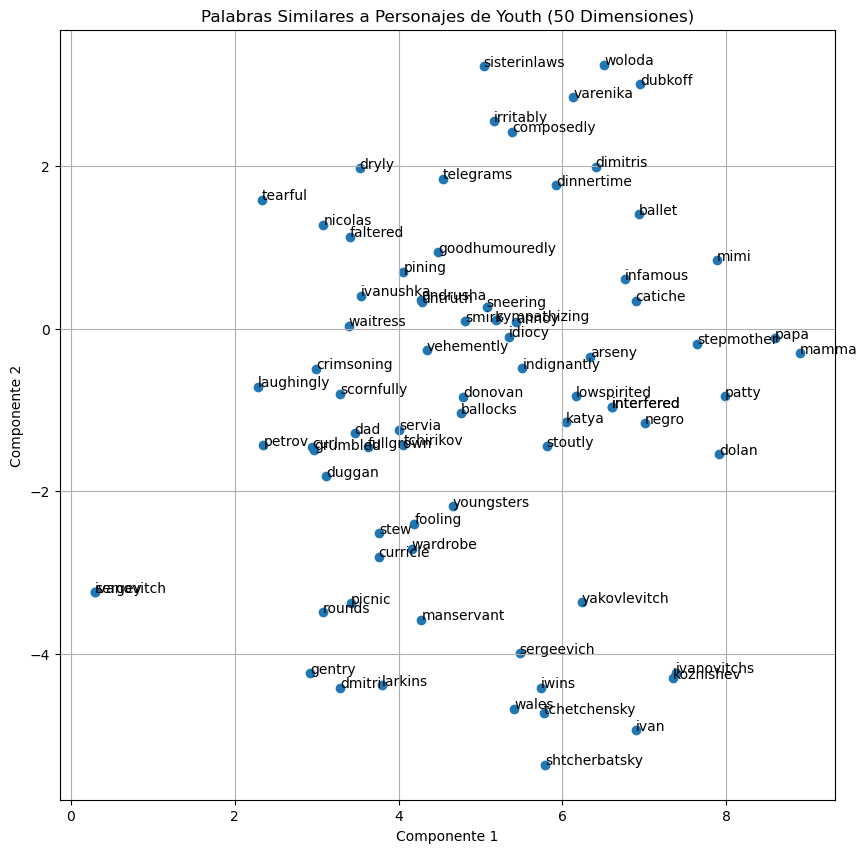

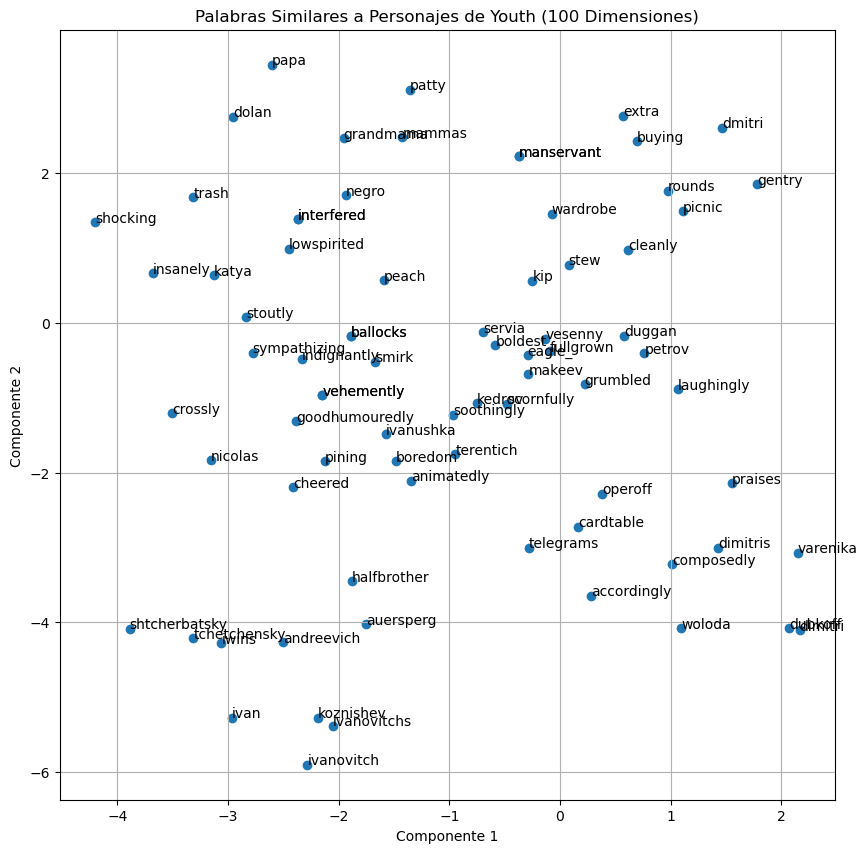

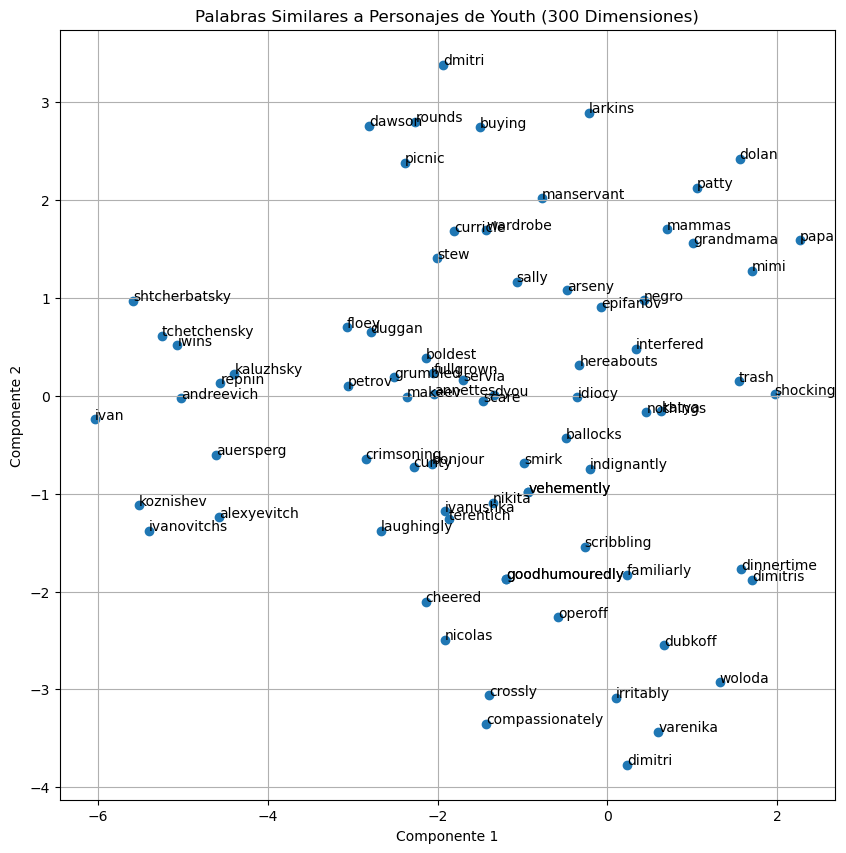

Visualizando embeddings para War and Peace de Leo Tolstoy...


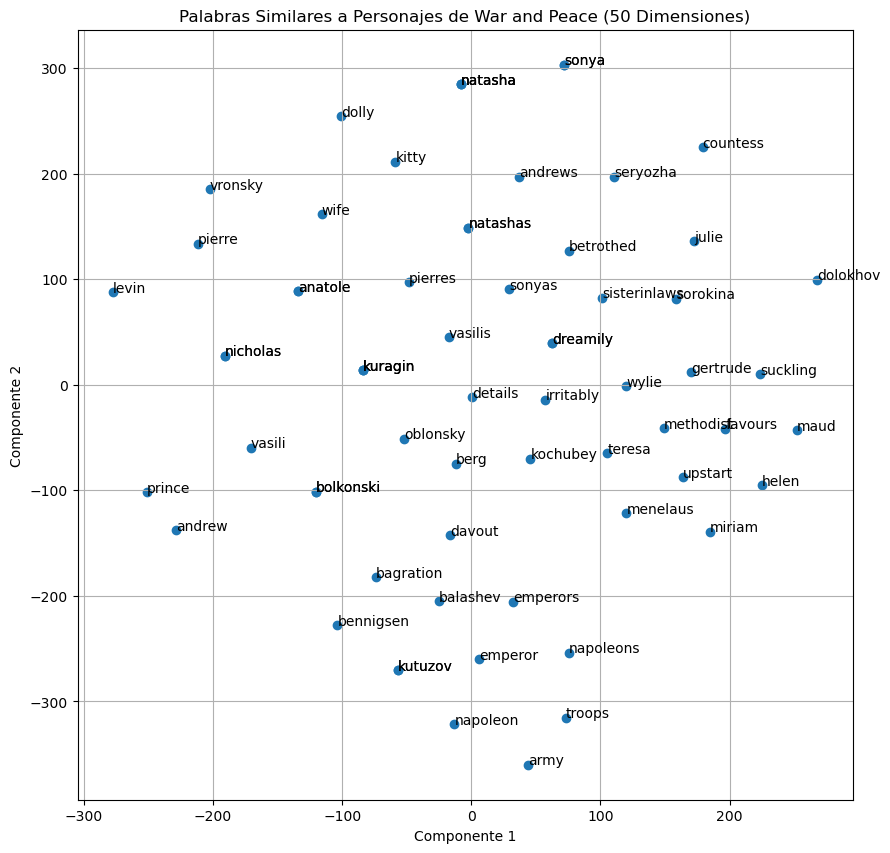

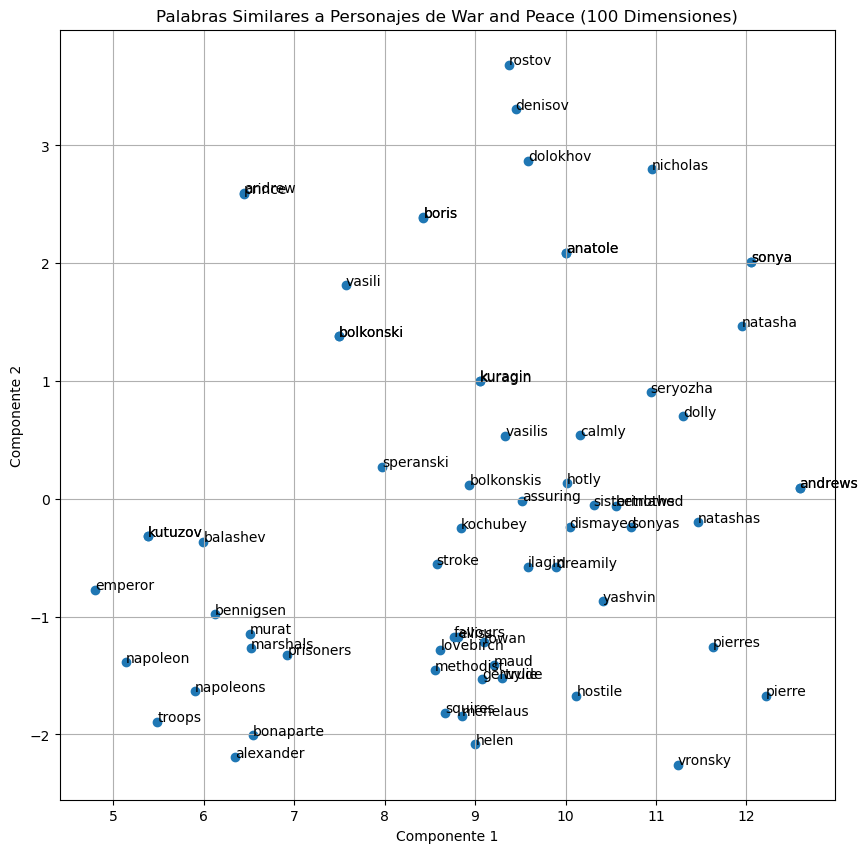

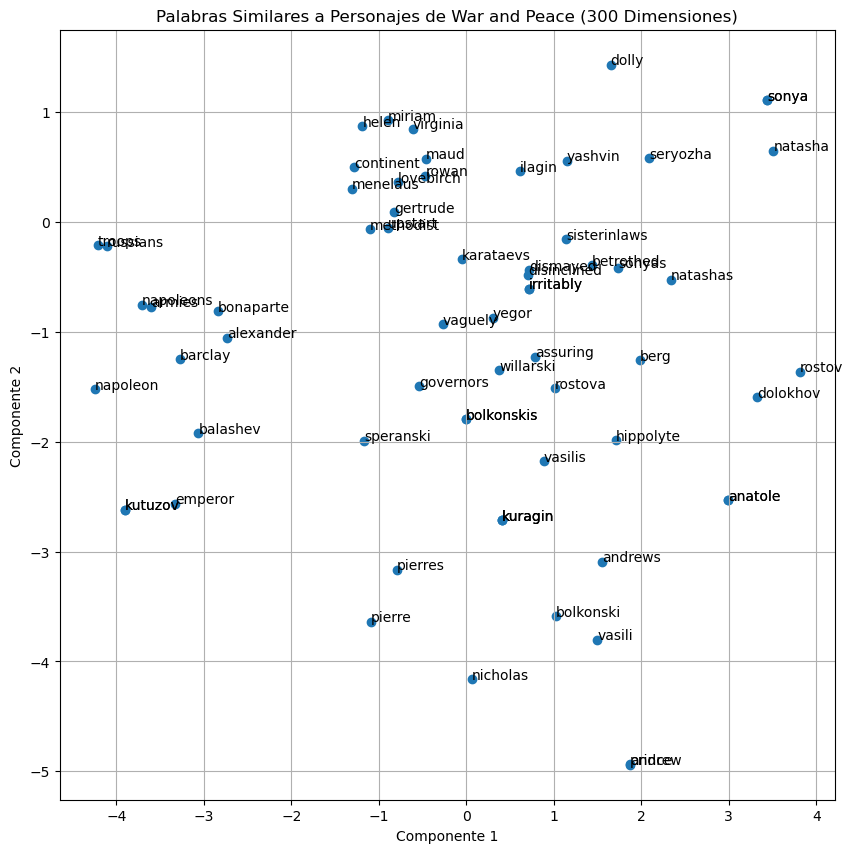

Visualizando embeddings para Anna Karenina de Leo Tolstoy...


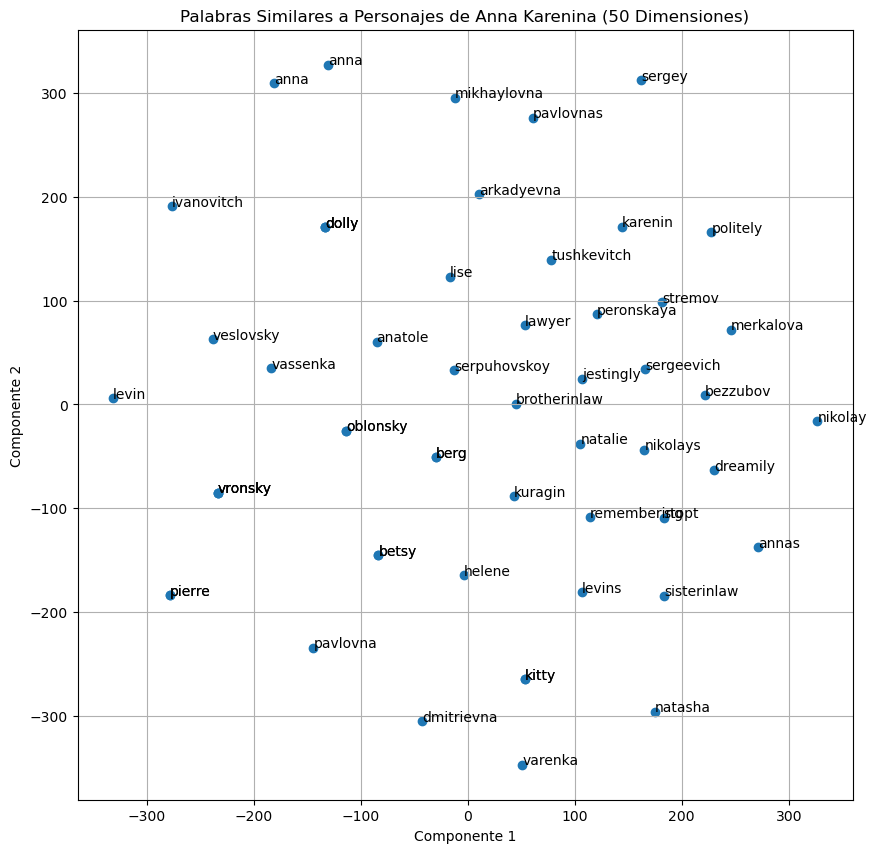

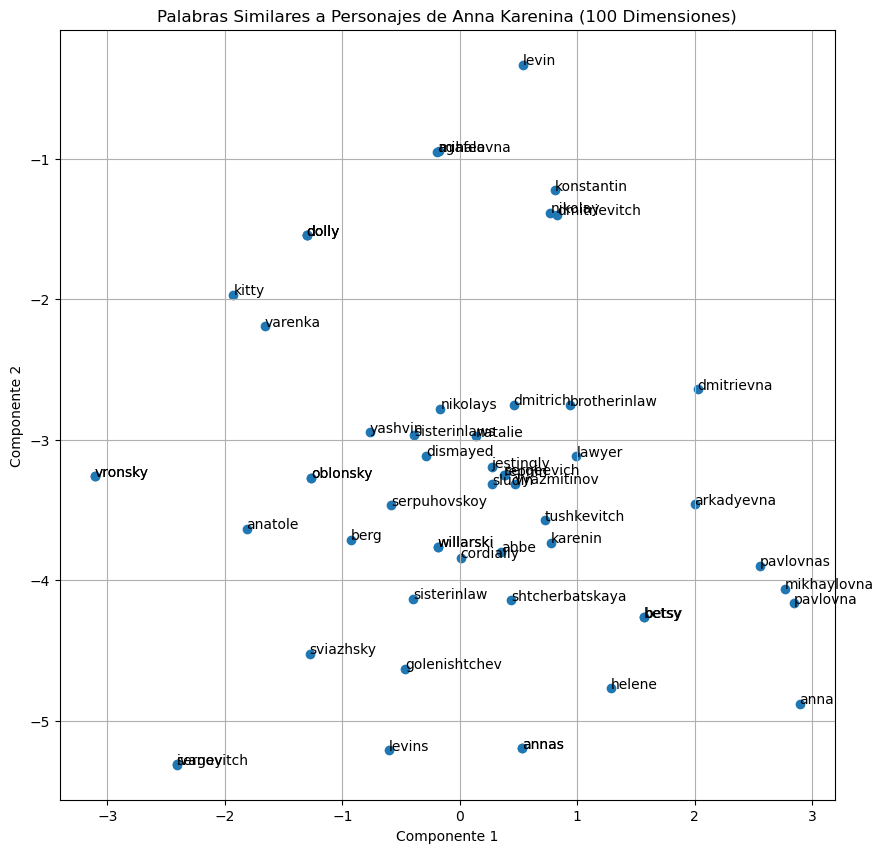

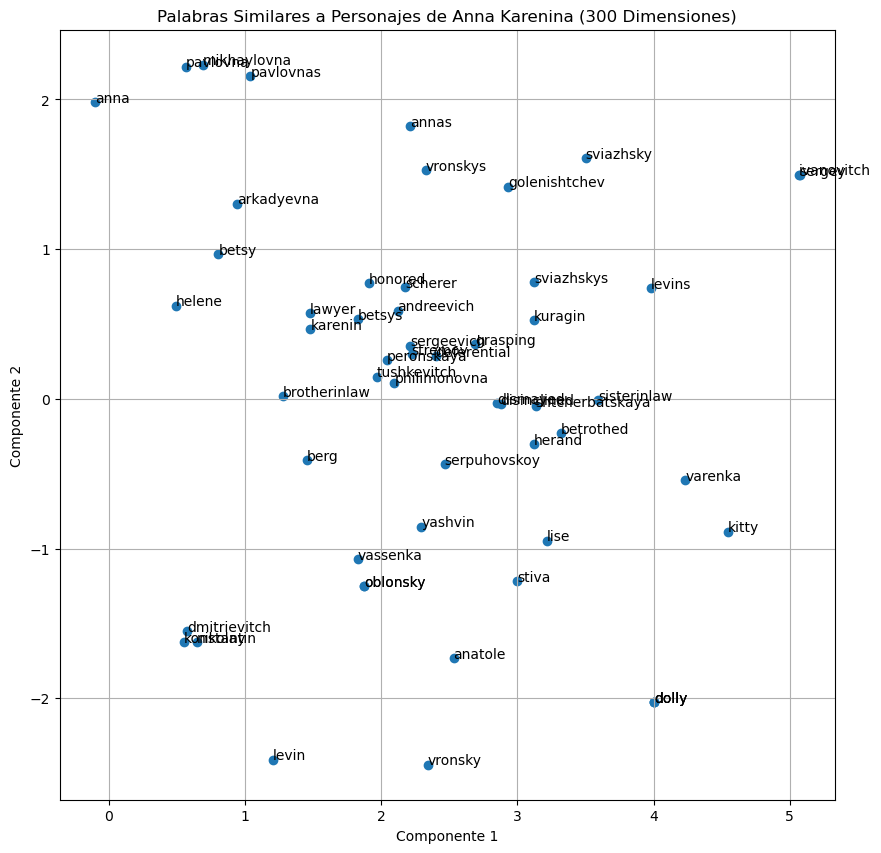

Visualizando embeddings para Dubliners de James Joyce...


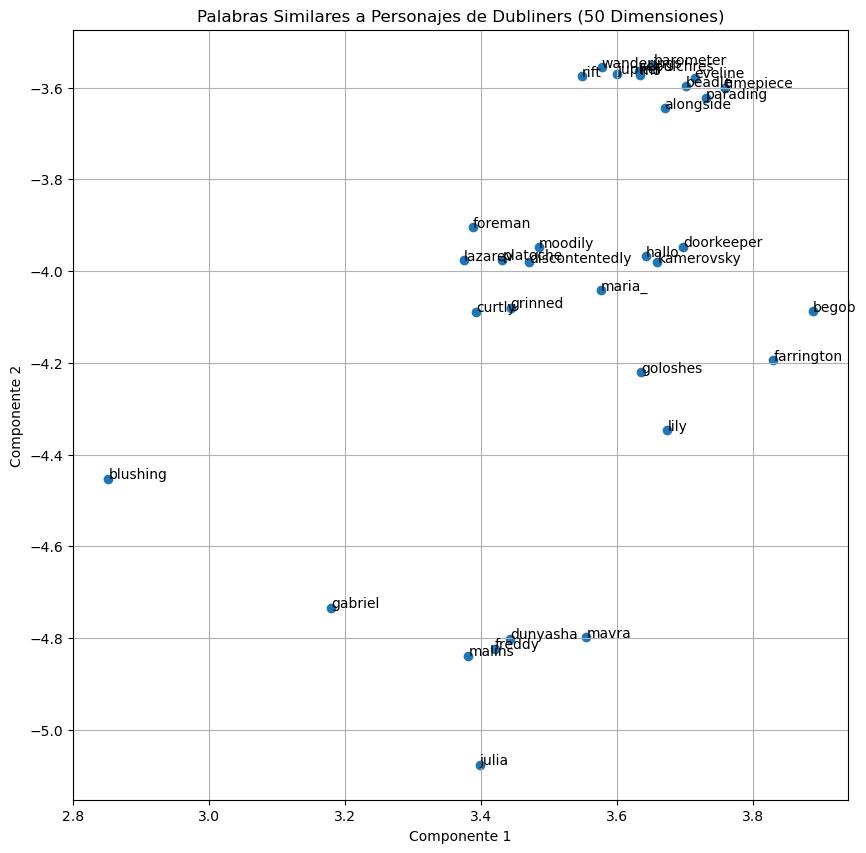

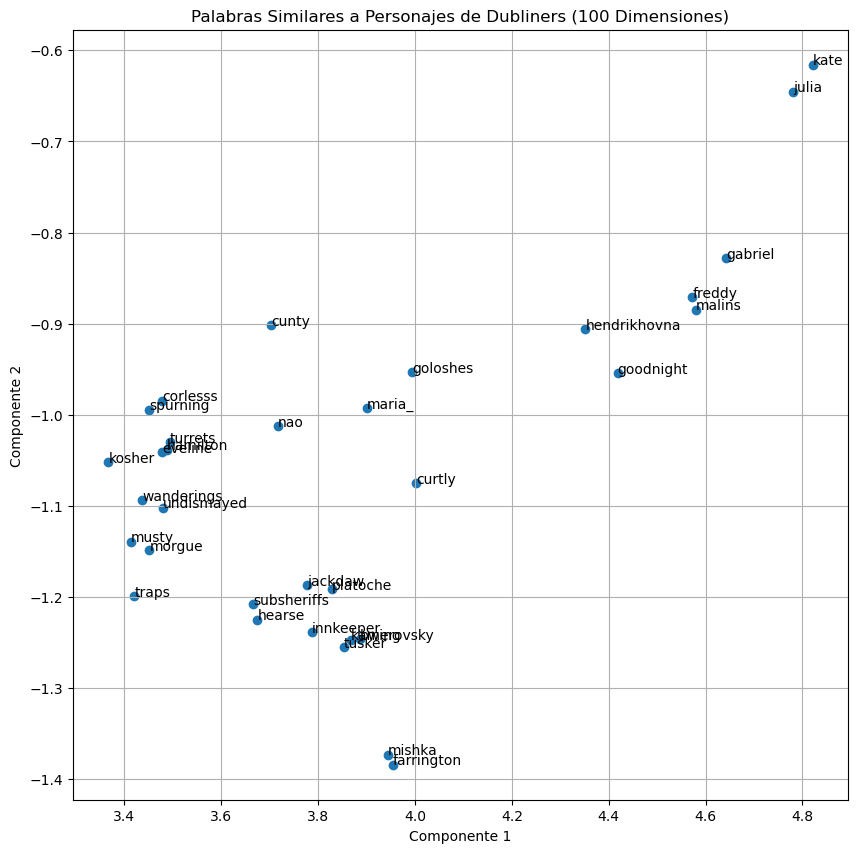

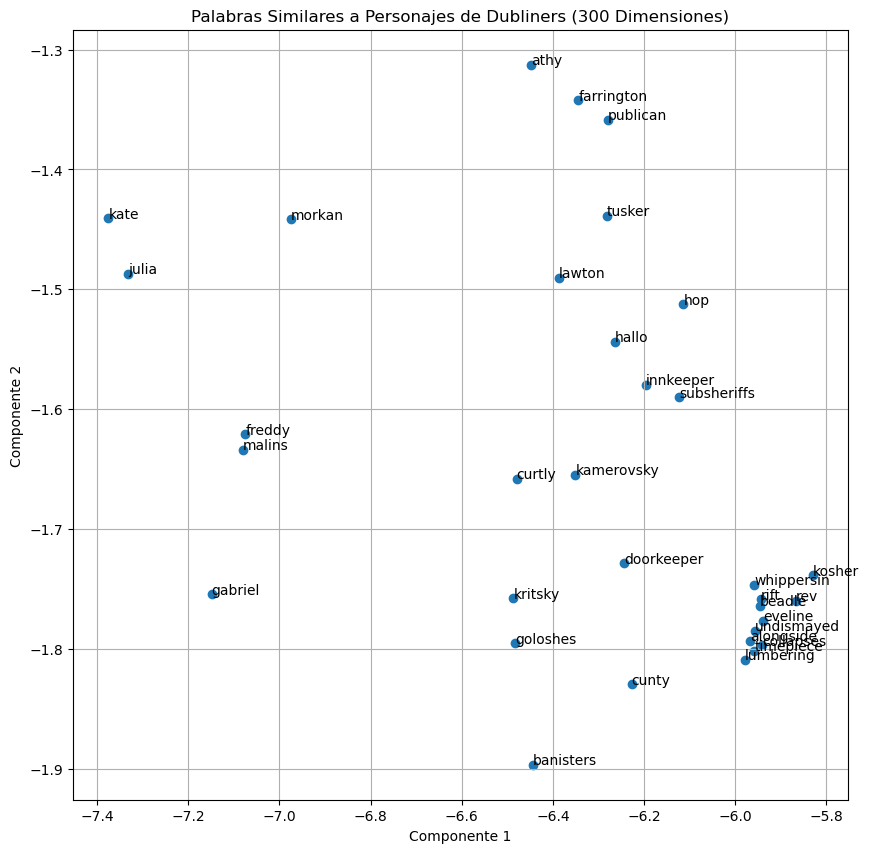

Visualizando embeddings para A Portrait of the Artist as a Young Man de James Joyce...


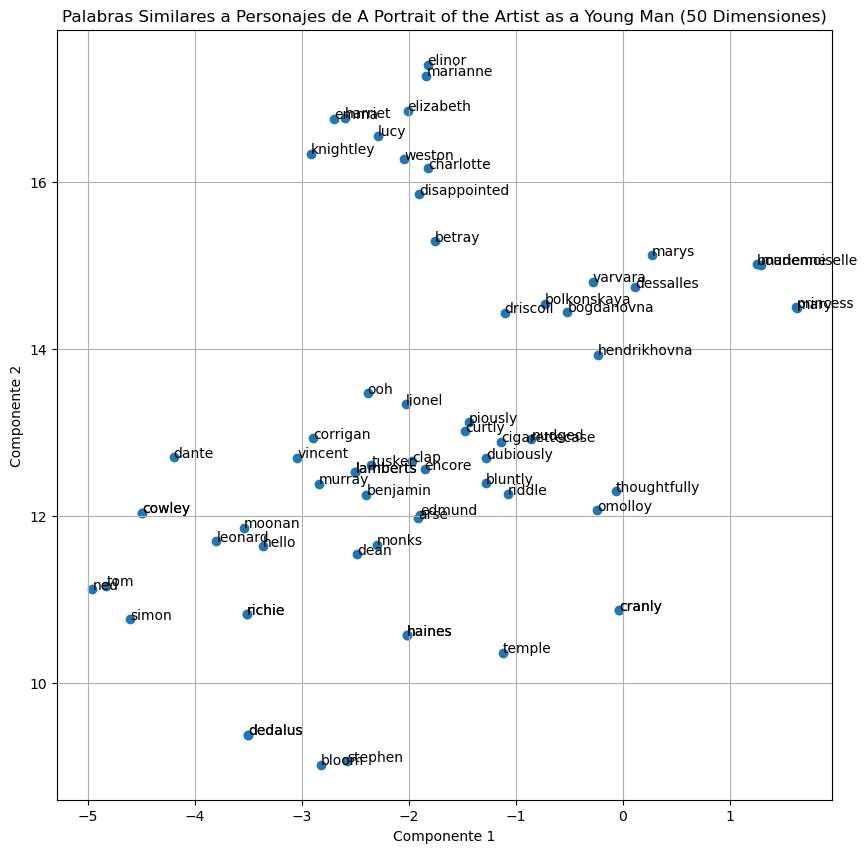

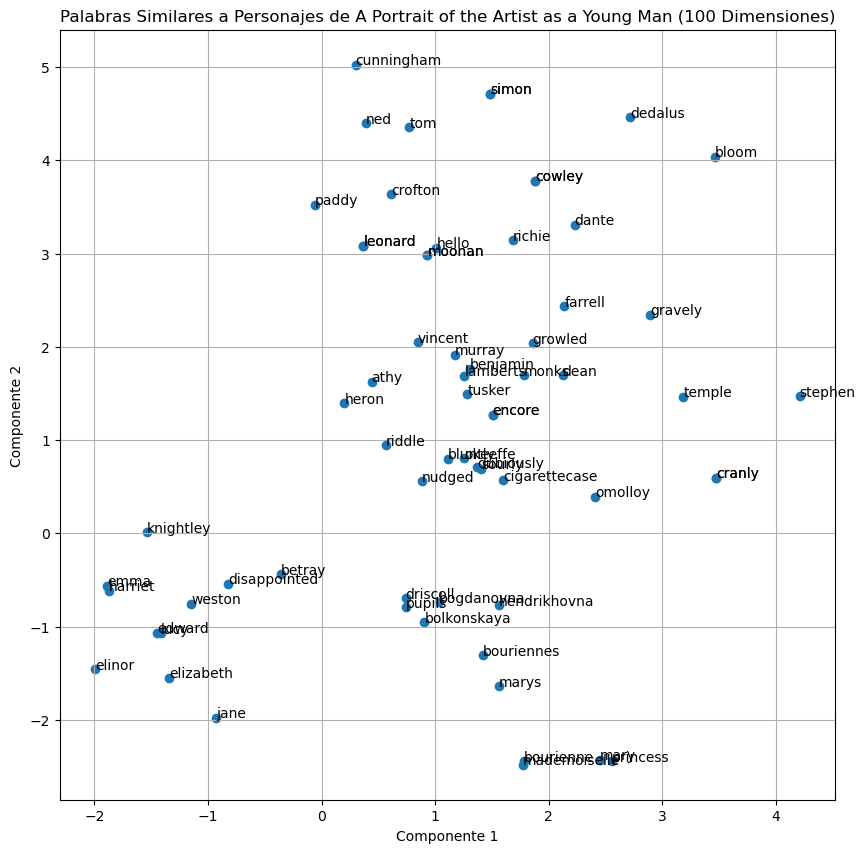

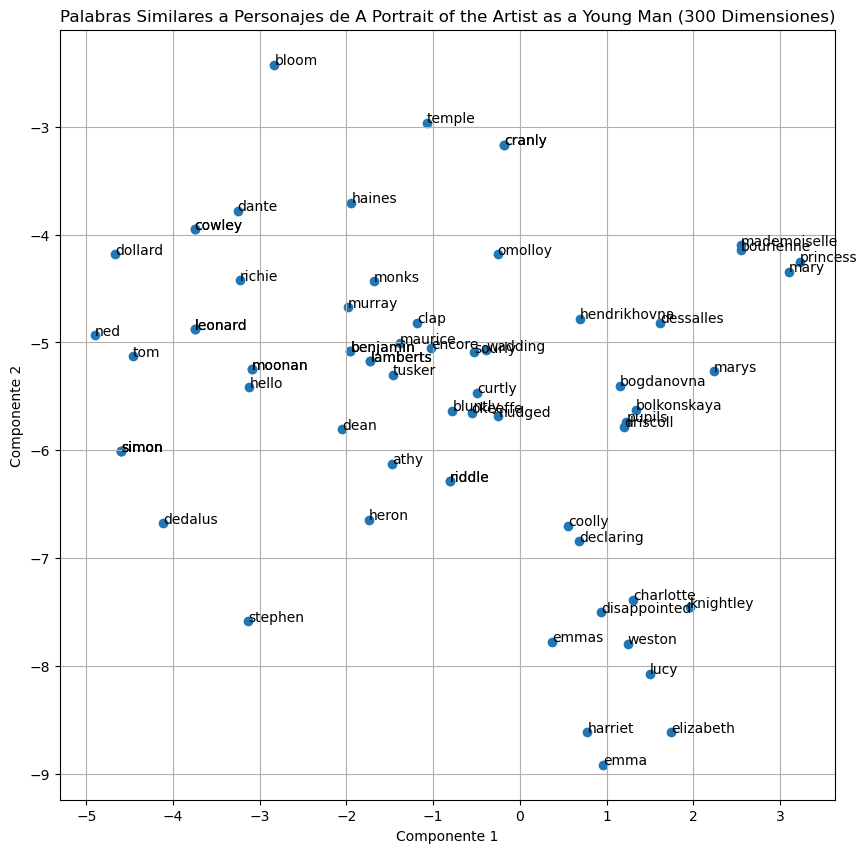

Visualizando embeddings para Ulysses de James Joyce...


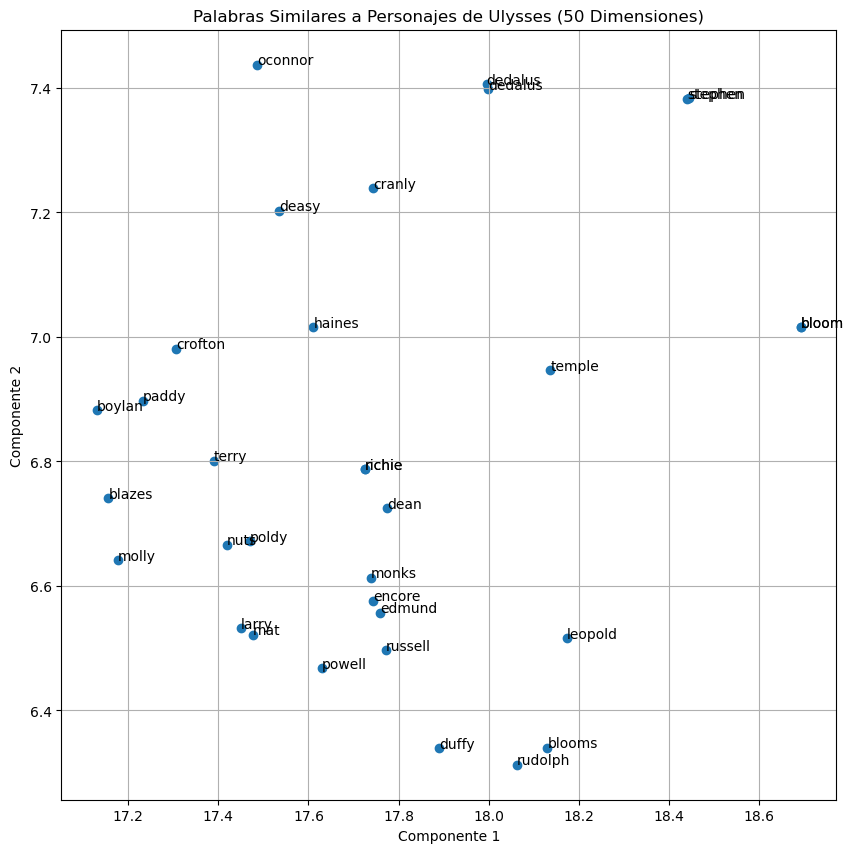

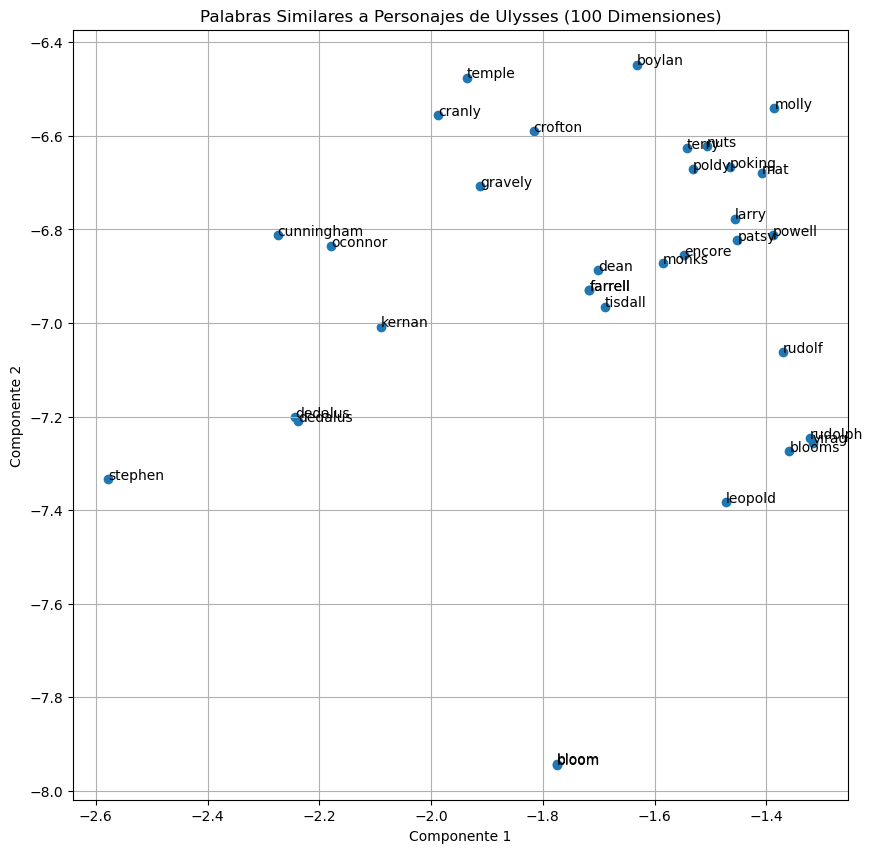

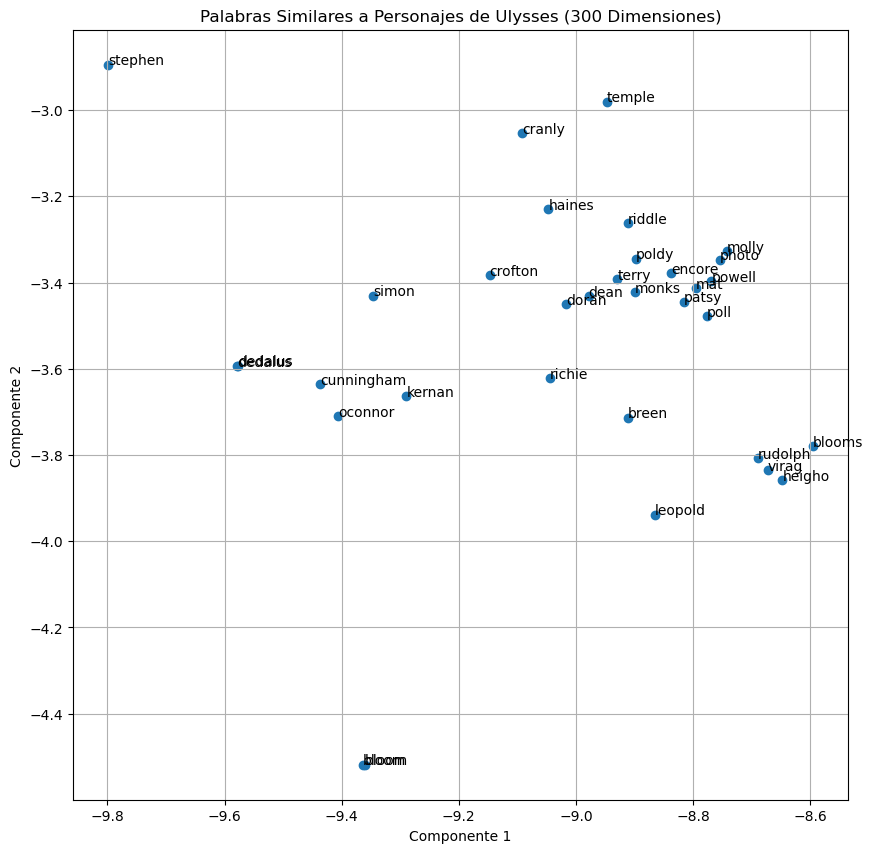

In [3]:
# Ruta a los modelos Word2Vec combinados con diferentes tamaños de vectores
books_models = [
    'data/models/Books_50_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    'data/models/Books_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    'data/models/Books_300_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model'
]

# Nombres de los personajes principales de cada libro
books_main_characters = {
    'Sense and Sensibility de Jane Austen': ['elinor', 'marianne', 'edward', 'brandon', 'willoughby'],
    'Pride and Prejudice de Jane Austen': ['elizabeth', 'darcy', 'jane', 'bingley', 'lydia', 'wickham'],
    'Emma de Jane Austen': ['emma', 'knightley', 'harriet', 'churchill', 'jane'],
    'Youth de Leo Tolstoy': ['nicolas', 'dmitri', 'woloda', 'papa', 'katya', 'ivan', 'petrov'],
    'War and Peace de Leo Tolstoy': ['pierre', 'natasha', 'andrew', 'nicholas', 'helen', 'napoleon'],
    'Anna Karenina de Leo Tolstoy': ['anna', 'vronsky', 'levin', 'karenin', 'kitty'],
    'Dubliners de James Joyce': ['gabriel', 'eveline', 'farrington'],
    'A Portrait of the Artist as a Young Man de James Joyce': ['stephen', 'simon', 'mary', 'emma', 'cranly', 'dante'],
    'Ulysses de James Joyce': ['bloom', 'stephen', 'molly']
}

# Número de palabras similares a visualizar para cada personaje
num_similar_words = 10

# Iterar sobre cada libro y visualizar los embeddings de las palabras más similares a los personajes principales
for book, main_characters in books_main_characters.items():
    print(f"Visualizando embeddings para {book}...")

    for model_path in books_models:
        
        # Cargar el modelo Word2Vec para el libro actual
        numero_dimensiones = re.findall(r'\d+', model_path)[0]
        model = load_word2vec_model(model_path)
        
        # Lista para almacenar las palabras más similares y sus vectores
        words = []
        word_vectors = []
    
        # Encontrar las palabras más similares a cada personaje principal
        for character in main_characters:
            if character in model.wv:
                similar_words = model.wv.most_similar(character, topn=num_similar_words)
                words.append(character)  # Incluir el personaje en sí
                word_vectors.append(model.wv[character])
    
                for word, _ in similar_words:
                    words.append(word)
                    word_vectors.append(model.wv[word])
            else:
                print(f"{character} no está en el vocabulario del modelo con {numero_dimensiones} dimensiones.")
        
        if words:
            # Convertir la lista de vectores de palabras a un array de NumPy
            word_vectors_array = np.array(word_vectors)
        
            # Reducir la dimensionalidad de los vectores a 2D usando t-SNE
            reduced_vectors = reduce_dimensions(word_vectors_array, method='tsne')
            
            # Visualizar los embeddings
            book_title = book.split(' de ')[0]
            plot_embeddings(reduced_vectors, words, title=f'Palabras Similares a Personajes de {book_title} ({numero_dimensiones} Dimensiones)')
        else:
            print(f"No se encontraron vectores de palabras para {book} con {numero_dimensiones} dimensiones.")